In [8]:
import numpy as np
import matplotlib.pyplot as plt

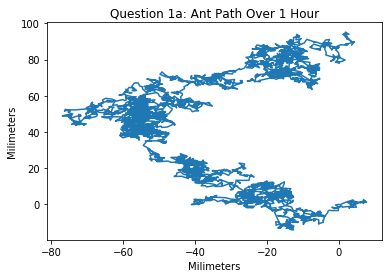

In [14]:
#Question 1a

plt.title("Question 1a: Ant Path Over 1 Hour")
plt.xlabel("Milimeters")
plt.ylabel("Milimeters")

start_x, start_y = 0, 0
x = [start_x]
y = [start_y]

for i in range(1, 3601): #3600 seconds per hour
    random_x = np.random.normal(0, 1, None)
    random_y = np.random.normal(0, 1, None)
    x.append(start_x + random_x)
    y.append(start_y + random_y)
    start_x = start_x + random_x
    start_y = start_y + random_y
    
plt.plot(x,y)

In [80]:
#Question 1b

def simulate():
    nest = (0, 0)
    steps = 0
    x = np.cumsum(np.random.normal(0,1,3600))
    y = np.cumsum(np.random.normal(0,1,3600))
    x = x[-1]
    y = y[-1]
    
    #distance = np.sqrt((x - 0)**2 + (y - 0)**2)
    while np.sqrt((x - 0)**2 + (y - 0)**2) > 5: #distance (formula) greater than 5mm
        x += np.random.normal(0,1)
        y += np.random.normal(0,1)
        steps+=1
        if steps > 3600:
            break
    return steps

total_trials=1000
threshold=3600
success=0

for i in range(total_trials):
    steps = simulate()
    if steps <= threshold:
        success += 1
probability = success/total_trials
print(probability)

#The results show that this is NOT a good strategy, considering that the ant makes it within 5mm of the nest approximately 13.5% of the time.

0.135


In [32]:
#Question 1c

total_trials = 1000
threshold = 3600
distances = []

for i in range(total_trials):
    steps = 0
    distance = 0
    minimum_distance = 100
    x = np.cumsum(np.random.normal(0, 1, 3600))
    y = np.cumsum(np.random.normal(0, 1, 3600))
    ex = x[-1]
    ey = y[-1]
    
    while steps <= threshold:
        new_x = ex + np.random.normal(0, 1)
        new_y = ey + np.random.normal(0, 1)
        ex = new_x
        ey = new_y
        steps += 1
        
        current_distance = np.sqrt((ex - x[0])**2 + (ey - y[0])**2)
        
        if current_distance < minimum_distance:
            minimum_distance = current_distance
        distance = minimum_distance
    distances.append(distance)
    
average = np.average(distances)
print(average)

44.20666816154342


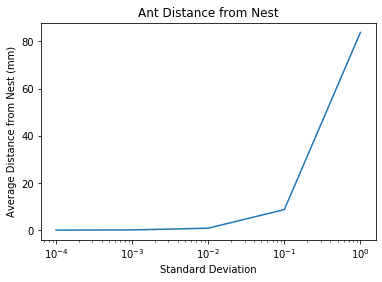

In [90]:
#Question 2

plt.title("Ant Distance from Nest")
plt.xlabel("Standard Deviation")
plt.ylabel("Average Distance from Nest (mm)")

def ant_path(x, y, x_memory, y_memory, s):
    for i in range(1, 3601):
        x_steps = np.random.normal(0, 1, None)
        x_noise = x_steps + np.random.normal(scale = s)
        y_steps = np.random.normal(0, 1, None)
        y_noise = y_steps + np.random.normal(scale = s)
        
        x_memory = x_memory + x_noise
        y_memory = y_memory + y_noise
        
        x = x + x_steps
        y = y + y_steps
        
    destination = [x, y]
    memory_destination = [x_memory, y_memory]
    
    calculation = [memory_destination[0] - destination[0], memory_destination[-1] - destination[-1]]
    homecoming = np.sqrt((calculation[0] - 0)**2 + (calculation[-1] - 0)**2)
    return homecoming

distances = []
average_distances = []

for i in range(len([.0001, .001, .01, .1, 1])):
    for j in range(1, 101):
        distances.append(ant_path(0,0,0,0,s[i]))
    average_distances.append(sum(distances)/100)

plt.xscale('log')
plt.plot(s, average_distances)

/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


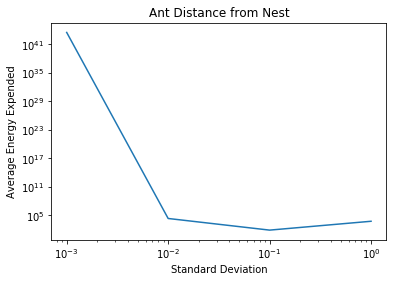

In [94]:
#Question 3a
#similar to Question 2

plt.title("Ant Distance from Nest")
plt.xlabel("Standard Deviation")
plt.ylabel("Average Energy Expended")

def energy(s, d):
    d = ant_path(0,0,0,0,s)
    in_energy = d**2 #to nest
    out_energy = np.exp(.1/s)
    return in_energy + out_energy

average_energy = []

for i in range(len([.0001, .001, .01, .1, 1])):
    energy_start = []
    for j in range (1, 101):
        sd = s[i]
        d = ant_path(0,0,0,0,s)
        energy_start.append(energy(sd,d))
    average_energy.append(sum(energy_start)/100)

plt.xscale('log')
plt.yscale('log')
plt.plot(s, average_energy)

In [35]:
#Question 3b

print("Question 3b:")
print("The minimum of the plot in 3a is where the best energy expenditure occurred, or in other words, where it was the most efficient. In terms of evolutionary significance, it is likely that ants have adapted overtime to adjust to the most efficient energy expenditure that correlates to a certain amount of noise. Darwinism focused on ideas such as natural selection and the surival of the fittest. In this case, ants must evolve accordingly with more efficient energy expenditure.")

Question 3b:
The minimum of the plot in 3a is where the best energy expenditure occurred, or in other words, where it was the most efficient. In terms of evolutionary significance, it is likely that ants have adapted overtime to adjust to the most efficient energy expenditure that correlates to a certain amount of noise. Darwinism focused on ideas such as natural selection and the surival of the fittest. In this case, ants must evolve accordingly with more efficient energy expenditure.
